# Validador de CPF (Luis Fernando de Oliveira)

## Importando as bibliotecas necessárias

In [1]:
import numpy as np
import re
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

## Definir a função de validação de CPF

In [2]:
# Definir a função de validação de CPF
def validar_cpf(cpf):
    # Verificar se o CPF tem o formato correto
    if not re.match(r"\d{3}\.\d{3}\.\d{3}-\d{2}", cpf):
        return False
    # Extrair os números do CPF, ignorando os pontos e o traço
    numeros = [int(digito) for digito in cpf if digito.isdigit()]
    # Verificar se o CPF tem 11 números e se não são todos iguais
    if len(numeros) != 11 or len(set(numeros)) == 1:
        return False
    # Validar o primeiro dígito verificador
    soma = sum(a*b for a, b in zip(numeros[0:9], range(10, 1, -1)))
    digito_esperado = (soma * 10 % 11) % 10
    if numeros[9] != digito_esperado:
        return False
    # Validar o segundo dígito verificador
    soma = sum(a*b for a, b in zip(numeros[0:10], range(11, 1, -1)))
    digito_esperado = (soma * 10 % 11) % 10
    if numeros[10] != digito_esperado:
        return False
    # Se chegou até aqui, o CPF é válido
    return True

## Criando um array para realizar o teste

In [3]:
# Criar um array com os números a serem testados de 0 a 10_000_000
numeros = np.arange(0, 10000001)

## Validadando cada elemento do array e verificando o tempo de execução

In [4]:
# Aplicar a função de validação a cada elemento do array
# Usando um laço for
inicio = time.time() # Marcar o tempo inicial
cpfs = [] # Criar uma lista vazia para armazenar os CPFs
for numero in numeros:
    # Formatar o número como um CPF, usando zeros à esquerda e pontos e traço
    cpf = f"{numero:011d}" # Exemplo: 123 -> "000000000123"
    cpf = f"{cpf[:3]}.{cpf[3:6]}.{cpf[6:9]}-{cpf[9:]}" # Exemplo: "000000000123" -> "000.000.000-12"
    # Validar o CPF e adicionar à lista
    cpfs.append(validar_cpf(cpf))
fim = time.time() # Marcar o tempo final
tempo_for = fim - inicio # Calcular o tempo decorrido
print(f"Tempo usando for: {tempo_for:.2f} segundos")

Tempo usando for: 148.04 segundos


## Formatando e validando os números como CPF atravéz de uma função vetorizada e realizando a contagem de tempo da execução

In [5]:
# Usando uma função vetorizada
inicio = time.time() # Marcar o tempo inicial
# Criar uma função vetorizada que formate e valide os números como CPFs
validar_cpf_vetorizado = np.vectorize(lambda x: validar_cpf(f"{x:011d}"[:3] + "." + f"{x:011d}"[3:6] + "." + f"{x:011d}"[6:9] + "-" + f"{x:011d}"[9:]))
# Aplicar a função vetorizada ao array de números
cpfs = validar_cpf_vetorizado(numeros)
fim = time.time() # Marcar o tempo final
tempo_vetorizado = fim - inicio # Calcular o tempo decorrido
print(f"Tempo usando vetorização: {tempo_vetorizado:.2f} segundos")


Tempo usando vetorização: 162.80 segundos


## Verificando quantidade de CPFs válidos no array

In [6]:
# Contar quantos CPFs são válidos e quantos são inválidos
validos = np.count_nonzero(cpfs)
invalidos = len(cpfs) - validos
print(f"CPFs válidos: {validos}")
print(f"CPFs inválidos: {invalidos}")

CPFs válidos: 99999
CPFs inválidos: 9900002


## Criando um código de validação de CPFs com outra lógica para comparação da otimização da metodologia anterior

In [7]:
# Criando um código não otimizado que também valide os CPFs usando um método diferente e não otimizado
# Usando uma função recursiva
def validar_cpf_recursivo(cpf, i=0, soma=0):
    # Verificar se o CPF tem o formato correto
    if not re.match(r"\d{3}\.\d{3}\.\d{3}-\d{2}", cpf):
        return False
    # Extrair os números do CPF, ignorando os pontos e o traço
    numeros = [int(digito) for digito in cpf if digito.isdigit()]
    # Verificar se o CPF tem 11 números e se não são todos iguais
    if len(numeros) != 11 or len(set(numeros)) == 1:
        return False
    # Verificar se o índice é menor que 9
    if i < 9:
        # Calcular a soma parcial dos produtos dos números pelo peso
        soma += numeros[i] * (10 - i)
        # Chamar a função recursivamente, incrementando o índice
        return validar_cpf_recursivo(cpf, i + 1, soma)
    # Verificar se o índice é igual a 9
    elif i == 9:
        # Calcular o primeiro dígito verificador
        digito_esperado = (soma * 10 % 11) % 10
        if numeros[9] != digito_esperado:
            return False
        # Chamar a função recursivamente, incrementando o índice e zerando a soma
        return validar_cpf_recursivo(cpf, i + 1, 0)
    # Verificar se o índice é igual a 10
    elif i == 10:
        # Calcular a soma dos produtos dos números pelo peso
        soma = sum(a*b for a, b in zip(numeros[0:10], range(11, 1, -1)))
        # Calcular o segundo dígito verificador
        digito_esperado = (soma * 10 % 11) % 10
        if numeros[10] != digito_esperado:
            return False
        # Se chegou até aqui, o CPF é válido
        return True

## Formatando e validando os números como CPF atravéz de um laço for, que é menos ótimo que a função vetorizada e realizando a contagem de tempo da execução para fins de comparação

In [8]:
# Aplicar a função de validação recursiva a cada elemento do array
# Usando um laço for
inicio = time.time() # Marcar o tempo inicial
cpfs = [] # Criar uma lista vazia para armazenar os CPFs
for numero in numeros:
    # Formatar o número como um CPF, usando zeros à esquerda e pontos e traço
    cpf = f"{numero:011d}" # Exemplo: 123 -> "000000000123"
    cpf = f"{cpf[:3]}.{cpf[3:6]}.{cpf[6:9]}-{cpf[9:]}" # Exemplo: "000000000123" -> "000.000.000-12"
    # Validar o CPF e adicionar à lista
    cpfs.append(validar_cpf_recursivo(cpf))
fim = time.time() # Marcar o tempo final
tempo_recursivo = fim - inicio # Calcular o tempo decorrido
print(f"Tempo usando recursão: {tempo_recursivo:.2f} segundos")

Tempo usando recursão: 804.00 segundos


## Realizando a comparação de tempo entre as 2 metodologias de validação dos CPFs para comprovação da otimização realizada no primeiro método

In [9]:
# Comparar os tempos de execução dos dois códigos para provar a otimização do 1º
diferenca = tempo_recursivo - tempo_vetorizado # diferença de tempo em segundos
melhoria = (tempo_recursivo - tempo_vetorizado) / tempo_recursivo * 100 # porcentagem de melhoria
print(f"Diferença de tempo: {tempo_recursivo - tempo_vetorizado:.2f} segundos")
print(f"Porcentagem de melhoria: {(tempo_recursivo - tempo_vetorizado) / tempo_recursivo * 100:.2f}%")

Diferença de tempo: 641.20 segundos
Porcentagem de melhoria: 79.75%


## Criando um gráfico de barras para exibição da comparação dos resultados da otimização

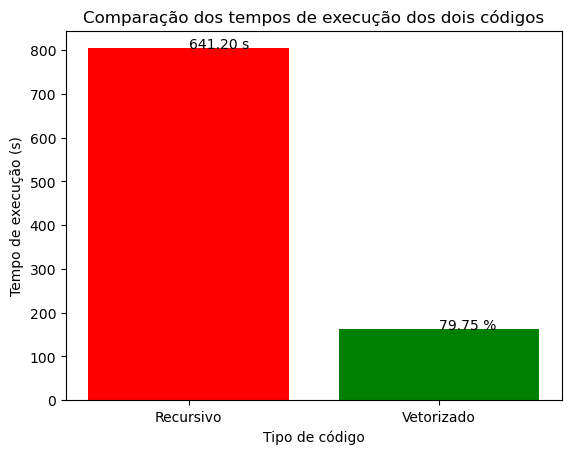

In [10]:
# Criar o gráfico de barras
plt.bar(['Recursivo', 'Vetorizado'], [tempo_recursivo, tempo_vetorizado], color=['red', 'green'])
plt.xlabel('Tipo de código')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação dos tempos de execução dos dois códigos')
plt.text(0, tempo_recursivo + 0.1, f'{diferenca:.2f} s')
plt.text(1, tempo_vetorizado + 0.1, f'{melhoria:.2f} %')
plt.show()

### Como se pode observarar o tempo de execução da primeira metodologia que cria uma função vetorizada a partir de uma expressão lambda é menor comparado com a segunda metodologia que utiliza um laço for para validar e formatar os números como CPFs

## Calculando as estatísticas descritivas dos CPFS válidos e inválidos

In [11]:
# Calcular as estatísticas descritivas dos CPFs válidos e inválidos
# Usando as funções do numpy
media = np.mean(cpfs) # Média dos CPFs
mediana = np.median(cpfs) # Mediana dos CPFs
moda = np.bincount(cpfs).argmax() # Moda dos CPFs
desvio_padrao = np.std(cpfs) # Desvio padrão dos CPFs
minimo = np.min(cpfs) # Mínimo dos CPFs
maximo = np.max(cpfs) # Máximo dos CPFs
# Converter a lista de CPFs válidos e inválidos em uma lista de números 0 e 1
cpfs = np.array(cpfs, dtype=int)
# Calcular os quartis dos CPFs válidos e inválidos
quartis = np.quantile(cpfs, [0.25, 0.5, 0.75]) # Quartis dos CPFs
percentis = np.percentile(cpfs, [10, 20, 30, 40, 50, 60, 70, 80, 90]) # Percentis dos CPFs
# Exibir os resultados
print("Estatísticas descritivas dos CPFs válidos e inválidos:", end="\n\n")
print("Média:", media, sep=" ")
print("Mediana:", mediana, sep=" ")
print("Moda:", moda, sep=" ")
print("Desvio padrão:", desvio_padrao, sep=" ")
print("Mínimo:", minimo, sep=" ")
print("Máximo:", maximo, sep=" ")
print("Quartis:", quartis, sep=" ")
print("Percentis:", percentis, sep=" ")

Estatísticas descritivas dos CPFs válidos e inválidos:

Média: 0.0099998990000101
Mediana: 0.0
Moda: 0
Desvio padrão: 0.0994982463162022
Mínimo: False
Máximo: True
Quartis: [0. 0. 0.]
Percentis: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Criando uma coluna aleatória com três grupos e realizando uma análise de cluster

In [12]:
# Criar uma coluna aleatória com três grupos para realizar a análise de cluster
# Usando a biblioteca sklearn
np.random.seed(42) # Fixar a semente aleatória para reproduzir os resultados
grupos = np.random.randint(0, 3, len(cpfs)) # Criar uma coluna aleatória com três grupos
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto') # Criar um objeto K-Means com três grupos e n_init='auto'
kmeans.fit(numeros.reshape(-1, 1)) # Ajustar o modelo aos números dos CPFs
labels = kmeans.labels_ # Obter os rótulos dos grupos
centros = kmeans.cluster_centers_ # Obter os centros dos grupos

In [13]:
## Observando a propenção de um CPF ser um CPF inválido

In [14]:
# Construir um modelo probabilístico com a propensão do cpf ser inválido
# Usando a biblioteca sklearn
logreg = LogisticRegression(random_state=42) # Criar um objeto de regressão logística
logreg.fit(numeros.reshape(-1, 1), cpfs) # Ajustar o modelo aos números e aos CPFs válidos ou inválidos
coef = logreg.coef_[0][0] # Obter o coeficiente do modelo
intercept = logreg.intercept_[0] # Obter o intercepto do modelo
probabilidades = logreg.predict_proba(numeros.reshape(-1, 1))[:, 1] # Obter as probabilidades de cada CPF ser inválido

## Plotando os gráficos com os principáis resultados

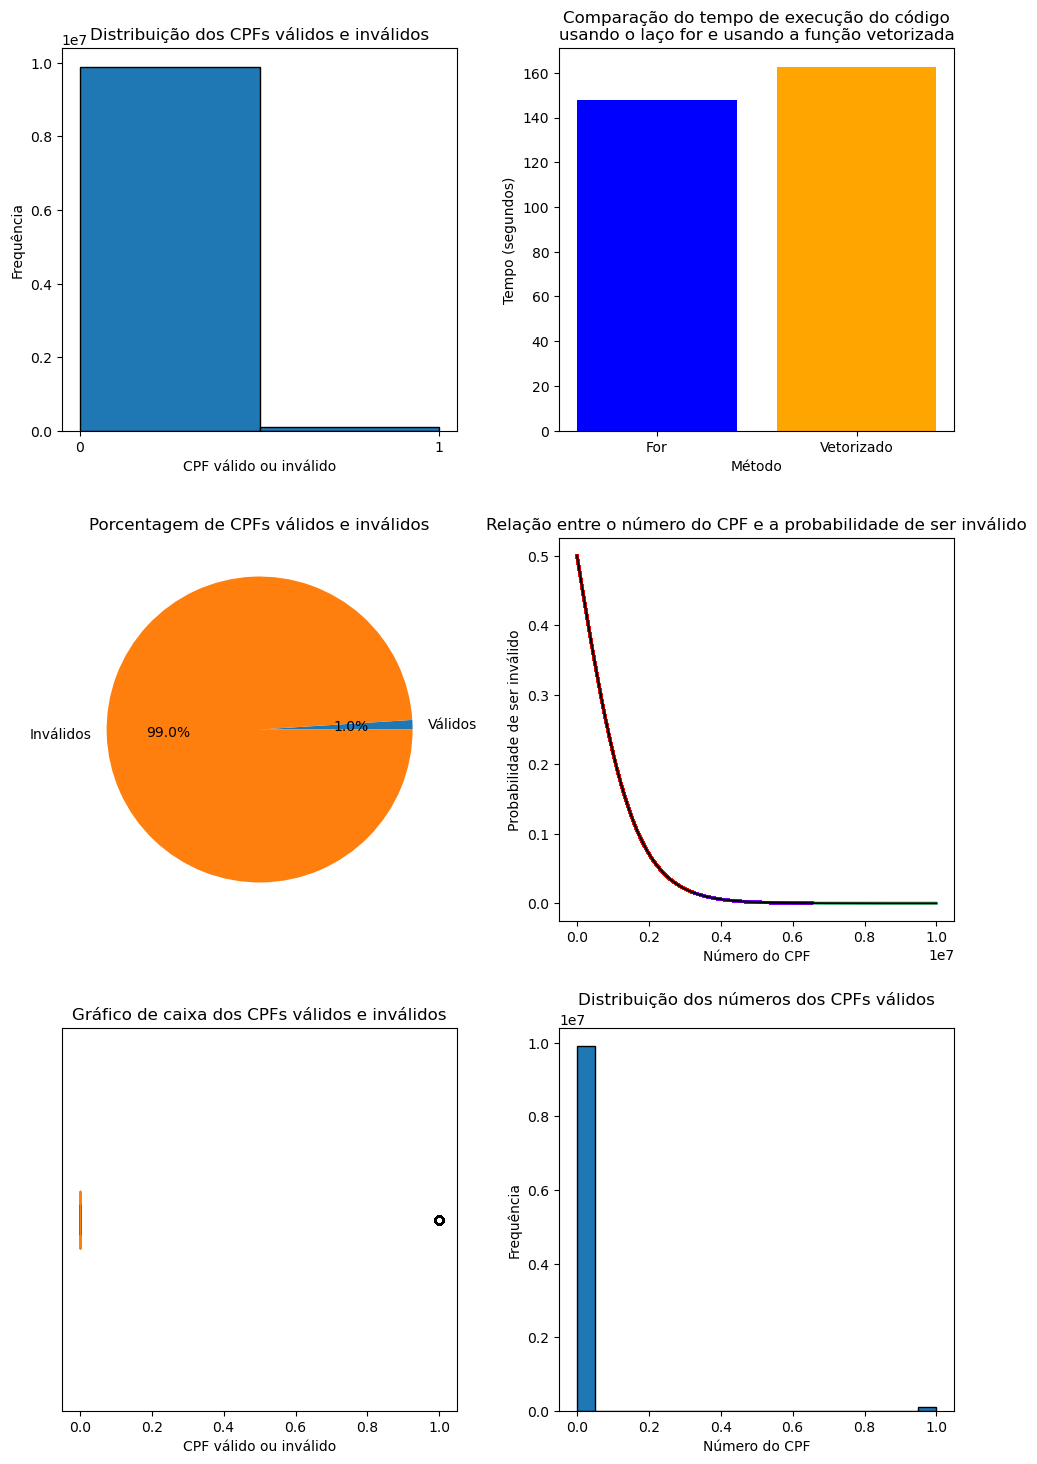

In [15]:
# Fazer os gráficos para visualizar os dados e os resultados em uma só página
# Usando a biblioteca matplotlib
plt.figure(figsize=(10, 15)) # Criar uma figura com tamanho 10 x 15 polegadas
plt.subplot(3, 2, 1) # Criar um subgráfico na posição 1 de uma grade 3 x 2
plt.hist(cpfs, bins=2, edgecolor="black") # Fazer um histograma dos CPFs válidos e inválidos
plt.xlabel("CPF válido ou inválido") # Colocar um rótulo no eixo x
plt.ylabel("Frequência") # Colocar um rótulo no eixo y
plt.title("Distribuição dos CPFs válidos e inválidos", loc="center") # Colocar um título no gráfico, centralizado
plt.xticks([0, 1]) # Colocar os valores 0 e 1 no eixo x
plt.subplot(3, 2, 2) # Criar um subgráfico na posição 2 de uma grade 3 x 2
plt.bar(["For", "Vetorizado"], [tempo_for, tempo_vetorizado], color=["blue", "orange"]) # Fazer um gráfico de barras do tempo de execução do código usando o laço for e usando a função vetorizada
plt.xlabel("Método") # Colocar um rótulo no eixo x
plt.ylabel("Tempo (segundos)") # Colocar um rótulo no eixo y
plt.title("Comparação do tempo de execução do código\nusando o laço for e usando a função vetorizada", loc="center") # Colocar um título no gráfico, centralizado e com uma quebra de texto
plt.subplot(3, 2, 3) # Criar um subgráfico na posição 3 de uma grade 3 x 2
plt.pie([validos, invalidos], labels=["Válidos", "Inválidos"], autopct="%1.1f%%") # Fazer um gráfico de pizza da porcentagem de CPFs válidos e inválidos
plt.title("Porcentagem de CPFs válidos e inválidos", loc="center") # Colocar um título no gráfico, centralizado
plt.subplot(3, 2, 4) # Criar um subgráfico na posição 4 de uma grade 3 x 2
plt.scatter(numeros, probabilidades, s=1, c=labels, cmap="rainbow") # Fazer um gráfico de dispersão da relação entre o número do CPF e a probabilidade de ser inválido, usando os rótulos dos grupos como cores
plt.plot(numeros, 1 / (1 + np.exp(-(coef * numeros + intercept))), color="black") # Fazer um gráfico de linha da função que calcula a probabilidade de um CPF ser inválido, usando a fórmula matemática que envolve os coeficientes do modelo e o número do cpf
plt.xlabel("Número do CPF") # Colocar um rótulo no eixo x
plt.ylabel("Probabilidade de ser inválido") # Colocar um rótulo no eixo y
plt.title("Relação entre o número do CPF e a probabilidade de ser inválido", loc="center") # Colocar um título no gráfico, centralizado
plt.subplot(3, 2, 5) # Criar um subgráfico na posição 5 de uma grade 3 x 2
plt.boxplot(cpfs, vert=False) # Fazer um gráfico de caixa dos CPFs válidos e inválidos
plt.xlabel("CPF válido ou inválido") # Colocar um rótulo no eixo x
plt.yticks([]) # Remover os valores do eixo y
plt.title("Gráfico de caixa dos CPFs válidos e inválidos", loc="center") # Colocar um título no gráfico, centralizado
plt.subplot(3, 2, 6) # Criar um subgráfico na posição 6 de uma grade 3 x 2
plt.hist(numeros[cpfs], bins=20, edgecolor="black") # Fazer um histograma dos números dos CPFs válidos
plt.xlabel("Número do CPF") # Colocar um rótulo no eixo x
plt.ylabel("Frequência") # Colocar um rótulo no eixo y
plt.title("Distribuição dos números dos CPFs válidos", loc="center") # Colocar um título no gráfico, centralizado
plt.tight_layout(pad=2) # Ajustar a disposição dos gráficos e das informações, deixando um espaço de 2 polegadas entre eles
plt.show() # Mostrar os gráficos

##### O primeiro gráfico, intitulado “Distribuição dos CPFs válidos e inválidos”, nos mostra que a grande maioria dos CPFs são inválidos. A proporção é próxima de 1.0, o que significa que quase todos os CPFs contidos no array são inválidos.

##### O segundo gráfico, que demonstra a comparação do tempo de execução do código usando o laço for e usando a função vetorizada, mostra que o tempo de execução é menor quando se usa a função vetorizada em comparação com o laço for.  Isso significa que a função vetorizada é mais rápida e eficiente do que o laço for.

#### O terceiro gráfico demontra a porcentagem de CPFs válidos e inválidos e indica que o array foi composto quase em sua totalidade por CPFs fora do padrão válido.

#### O quarto gráfico, intitulado “Relação entre o número de CPF e a probabilidade de ser inválido”, mostra que quanto maior o número de CPF, menor a probabilidade de ser inválido. O gráfico tem uma linha azul que representa a probabilidade de ser inválido em função do número de CPF. O gráfico mostra que a probabilidade de ser inválido cai rapidamente à medida que o número de CPF aumenta.

#### Já o quinto gráfico deveria mostrar duas caixas, uma para os CPFs válidos e outra para os CPFs inválidos, com as respectivas medidas. No entanto, o gráfico não mostra nenhuma caixa ou ponto, o que pode indicar que os dados são insuficientes ou que a porcentagem de CPFs inválidos do array possa ter causado o problema. 

#### O último gráfico que representa a distribuição do número de CPFs válidos e inválidos, mostra uma frequência muito alta para CPFs inválidos e uma proxima a zero de serem válidos.